# CIV1499 - Introduction to Data Science


## Project 2 - Toronto Bike Share
### Set up Network

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

### 1. Weather Data

In [2]:
# Set weather data path
path_weather = "C:\\Users\\akmar\\project_2_bikeshare_toronto\\data\\weather\\"


# Get weather file names
weather_filenames = [filename for filename in os.listdir(path_weather) if 'climate' in filename]

# Print file names
print(weather_filenames[0:5])

['en_climate_hourly_ON_6158359_01-2017_P1H.csv', 'en_climate_hourly_ON_6158359_01-2018_P1H.csv', 'en_climate_hourly_ON_6158359_01-2019_P1H.csv', 'en_climate_hourly_ON_6158359_01-2020_P1H.csv', 'en_climate_hourly_ON_6158359_01-2021_P1H.csv']


In [3]:
len(weather_filenames)

60

In [4]:
#Creating a Dictionary for common columns' names in weather datasets
weather_col_dic ={
    "Date/Time": ["Date/Time", "Date/Time (LST)"],
    "Time": ["Time", "Time (LST)"],
}

#Create a new DF for Weather
weather_df = pd.DataFrame()
for i in range(len(weather_filenames)):
    temp_df = pd.read_csv(path_weather+"//"+weather_filenames[i],low_memory=False)
    for col in temp_df.columns:
        for key,val in weather_col_dic.items():

            for item in val:
                if col == item:
                    temp_df = temp_df.rename(columns={col:key})
    
    
    temp_df['Excel_File'] = str(weather_filenames[i].split('_')[5])
    weather_df = pd.concat([weather_df,temp_df],
                           ignore_index=True, sort = False, axis=0)

#Exporting the DataFrame
weather_df.to_csv('weather_df.csv', index=False )
    
#Weather Dataframe
weather_df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Excel_File,Precip. Amount (mm),Precip. Amount Flag
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 00:00,2017,1,1,00:00,1.5,...,99.81,NaN,NaN,NaN,NaN,NaN,NaN,01-2017,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 01:00,2017,1,1,01:00,1.5,...,100.01,NaN,NaN,NaN,NaN,NaN,NaN,01-2017,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 02:00,2017,1,1,02:00,1.0,...,100.14,NaN,NaN,NaN,NaN,NaN,NaN,01-2017,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 03:00,2017,1,1,03:00,1.2,...,100.32,NaN,NaN,NaN,NaN,NaN,NaN,01-2017,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 04:00,2017,1,1,04:00,1.3,...,100.48,NaN,NaN,NaN,NaN,NaN,NaN,01-2017,NaN,NaN


### 2. Bike Share Trip Data

In [5]:
# Set bikeshare data path
path_ridership = "C:\\Users\\akmar\\project_2_bikeshare_toronto\\data\\ridership\\"

# Create a list of file names for bike share trips data
trips_filenames = [filename for filename in os.listdir(os.path.join(path_ridership, 'release')) if 'bike_share' in filename]

# Create a dictionary where key:value pairs correspond to the file name and DataFrame respectively
trips_data = {filename: pd.read_csv(os.path.join(path_ridership, 'release', filename)) for filename in trips_filenames}  

# Now lets print out the column names for the first month of each year
print('2017\n{}\n'.format(trips_data['bike_share_2017-1.csv'].columns.tolist()))
print('2018\n{}\n'.format(trips_data['bike_share_2018-1.csv'].columns.tolist()))
print('2019\n{}\n'.format(trips_data['bike_share_2019-1.csv'].columns.tolist()))
print('2020\n{}\n'.format(trips_data['bike_share_2020-1.csv'].columns.tolist()))
print('2021\n{}\n'.format(trips_data['bike_share_2021-1.csv'].columns.tolist()))

2017
['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'user_type']

2018
['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']

2019
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2020
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2021
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']



In [6]:
#Creating a Dictionary of columns' name
bike_col_dic ={
    "ID": ["trip_id", "Trip Id", "ï»¿Trip Id"],
    "Start_Time": ["trip_start_time", "Start Time"],
    "End_Time": ["trip_stop_time","End Time"],
    "Duration": ["trip_duration_seconds","Trip  Duration"],
    "Start_Station_id": ["from_station_id","Start Station Id"],
    "Start_Station_name": ["from_station_name","Start Station Name"],
    "End_Station_id": ["to_station_id","End Station Id"],
    "End_Station_name": ["to_station_name","End Station Name"],
    "User_Type": ["user_type","User Type"]
}
#bike_col_dic


#Create a new DF for BikeRides
bikerides_df = pd.DataFrame()


for i in range(len(trips_filenames)):
    temp_df = pd.read_csv(path_ridership+"\\release\\"+trips_filenames[i], low_memory=False)
    for col in temp_df.columns:
        for key,val in bike_col_dic.items():
            
            for item in val:
                if col == item:
                    temp_df = temp_df.rename(columns={col:key})

    temp_df['Excel_File'] = str(trips_filenames[i].split("_")[2]).split(".")[0]
    bikerides_df = pd.concat([bikerides_df,temp_df],
                             ignore_index=True, sort = False, axis=0)

#Exporting the DataFrame
bikerides_df.to_csv('bikerides_df.csv', index=False )
    
#Weather Dataframe
bikerides_df.head()

,ID,Start_Time,End_Time,Duration,Start_Station_id,Start_Station_name,End_Station_id,End_Station_name,User_Type,Excel_File,Subscription Id,Bike Id
0,712441,2017-01-01 05:03 (UTC),2017-01-01 05:08 (UTC),274,7006.0,Bay St / College St (East Side),7021.0,Bay St / Albert St,Member,2017-1,NaN,NaN
1,712442,2017-01-01 05:03 (UTC),2017-01-01 05:12 (UTC),538,7046.0,Niagara St / Richmond St W,7147.0,King St W / Fraser Ave,Member,2017-1,NaN,NaN
2,712443,2017-01-01 05:05 (UTC),2017-01-01 05:22 (UTC),992,7048.0,Front St / Yonge St (Hockey Hall of Fame),7089.0,Church St / Wood St,Member,2017-1,NaN,NaN
3,712444,2017-01-01 05:09 (UTC),2017-01-01 05:26 (UTC),1005,7177.0,East Liberty St / Pirandello St,7202.0,Queen St W / York St (City Hall),Member,2017-1,NaN,NaN
4,712445,2017-01-01 05:14 (UTC),2017-01-01 05:25 (UTC),645,7203.0,Bathurst St / Queens Quay W,7010.0,King St W / Spadina Ave,Member,2017-1,NaN,NaN


In [7]:
bikerides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12195482 entries, 0 to 12195481
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ID                  int64  
 1   Start_Time          object 
 2   End_Time            object 
 3   Duration            int64  
 4   Start_Station_id    float64
 5   Start_Station_name  object 
 6   End_Station_id      float64
 7   End_Station_name    object 
 8   User_Type           object 
 9   Excel_File          object 
 10  Subscription Id     float64
 11  Bike Id             float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.1+ GB


### 3 Station Data

In [8]:
# Set stations data path
path_ridership = "C:\\Users\\akmar\\project_2_bikeshare_toronto\\data\\stations\\"

# Import stations
stations = pd.read_csv(os.path.join(path_ridership, 'bikeshare_stations.csv'))

# View DataFrame
stations.head()

,station_id,name,lat,lon
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954
1,7001,Wellesley Station Green P,43.664964,-79.383550
2,7002,St. George St / Bloor St W,43.667333,-79.399429
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761
4,7004,University Ave / Elm St,43.656518,-79.389099


In [9]:
bikerides_df.isna().sum()
# there is one end time row missing. I think we can just drop it.
# I've sent the code in the group on how to fix the station_id  and station_name
# 

ID                          0
Start_Time                  0
End_Time                    1
Duration                    0
Start_Station_id      1026893
Start_Station_name       3313
End_Station_id        1030516
End_Station_name         7023
User_Type                   0
Excel_File                  0
Subscription Id       7143261
Bike Id               3415600
dtype: int64

In [10]:
rides = bikerides_df.sample(frac = 0.001)
rides.shape

(12195, 12)

In [11]:
rides.to_csv('rides_df.csv', index=False )

# Exploratory Data

In [12]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [13]:
bikerides_df = pd.read_csv("rides_df.csv")
bikerides_df.shape

(12195, 12)

In [14]:
# String to DateTime for Start_Time and End_Time

def UTC_To_EST(x):
    """
    Converting datetime for UTC to EST
    """
    UTC_TO_EST = pd.Timestamp(x).tz_localize('UTC')
    return UTC_TO_EST.tz_convert('EST')

#Removing (UTC) and (EST) from Start_Time and End_Time Colums
bikerides_df['Time_Zone'] = bikerides_df.apply(
    lambda row: row["Start_Time"].split("(")[1].split(")")[0] if ("(" in row["Start_Time"]) else False, axis=1) 

bikerides_df['Start_Time'] = bikerides_df.apply(lambda row: row["Start_Time"].split("(")[0], axis=1)
bikerides_df['End_Time'] = bikerides_df.apply(lambda row: row["End_Time"].split("(")[0], axis=1)


#Converting String to DateTime
bikerides_df['Start_Time'] = pd.to_datetime(bikerides_df['Start_Time'])
bikerides_df['End_Time'] = pd.to_datetime(bikerides_df['End_Time'])


#Converting UTC to EST timezone
bikerides_df['Start_Time'] = bikerides_df.apply(
    lambda row: UTC_To_EST(row['Start_Time']) if row["Time_Zone"] == "UTC" else row['Start_Time'], axis=1)
bikerides_df['End_Time'] = bikerides_df.apply(
    lambda row: UTC_To_EST(row['End_Time']) if row["Time_Zone"] == "UTC" else row['End_Time'], axis=1) 

#Localizing Timestamps 

bikerides_df["Start_Time"] = bikerides_df.apply(
    lambda row: row["Start_Time"] if (
        str(row["Start_Time"].tzinfo) == "EST") else row["Start_Time"].tz_localize(tz ='EST'), axis = 1)
bikerides_df["End_Time"] = bikerides_df.apply(
    lambda row: row["End_Time"] if (
        str(row["End_Time"].tzinfo) == "EST") else row["End_Time"].tz_localize(tz ='EST'), axis = 1)

bikerides_df.head()

,ID,Start_Time,End_Time,Duration,Start_Station_id,Start_Station_name,End_Station_id,End_Station_name,User_Type,Excel_File,Subscription Id,Bike Id,Time_Zone
0,11982051,2021-12-06 14:18:00-05:00,2021-12-06 14:49:00-05:00,1851,7016.0,Bay St / Queens Quay W (Ferry Terminal),7207.0,Dundas St W / Crawford St,Annual Member,2021-6,NaN,5832.0,EST
1,5039271,2019-11-05 15:46:00-05:00,2019-11-05 16:34:00-05:00,2881,7036.0,Trinity St /Front St E,7117.0,Castle Frank Station,Casual Member,2019-5,329897.0,3528.0,EST
2,14336336,2021-10-30 21:27:00-05:00,2021-10-30 21:33:00-05:00,376,7164.0,Gould St / Yonge St (Ryerson University),7548.0,St Joseph St / Bay St - SMART,Casual Member,2021-10,NaN,5521.0,EST
3,7131808,2019-09-11 16:56:00-05:00,2019-09-11 17:07:00-05:00,658,7382.0,Simcoe St / Adelaide St W,7041.0,Edward St / Yonge St,Annual Member,2019-11,320577.0,3818.0,EST
4,11689319,2021-05-27 10:33:00-05:00,2021-05-27 10:44:00-05:00,697,7432.0,Frederick St / King St E,7059.0,Front St W / Blue Jays Way,Casual Member,2021-5,NaN,4693.0,EST


In [15]:
bikerides_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12195 entries, 0 to 12194
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   ID                  12195 non-null  int64              
 1   Start_Time          12195 non-null  datetime64[ns, EST]
 2   End_Time            12195 non-null  datetime64[ns, EST]
 3   Duration            12195 non-null  int64              
 4   Start_Station_id    11215 non-null  float64            
 5   Start_Station_name  12194 non-null  object             
 6   End_Station_id      11212 non-null  float64            
 7   End_Station_name    12188 non-null  object             
 8   User_Type           12195 non-null  object             
 9   Excel_File          12195 non-null  object             
 10  Subscription Id     4974 non-null   float64            
 11  Bike Id             8868 non-null   float64            
 12  Time_Zone           12195 non-nu

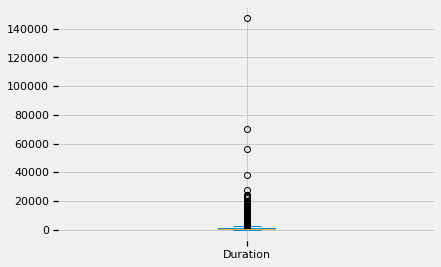

In [16]:
bikerides_df['Duration'].plot(kind='box');


In [17]:
# Cleaning the dataset
def remove_outliers(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return df[(df[variable] < upper_limit) & (df[variable] > lower_limit)]

bikerides_df = remove_outliers(bikerides_df, "Duration")

#Converting From float to Integer
bikerides_df.shape

(11698, 13)

In [18]:
bikerides_df["User_Type"].unique()

array(['Annual Member', 'Casual Member', 'Member', 'Casual'], dtype=object)

In [19]:
bikerides_df.loc[(bikerides_df.User_Type == 'Annual Member'),'User_Type']='Member'
bikerides_df.loc[(bikerides_df.User_Type == 'Casual Member'),'User_Type']='Casual'

In [20]:
bikerides_df["User_Type"].unique()

array(['Member', 'Casual'], dtype=object)

In [21]:
bikerides_df.groupby(["User_Type"])["ID"].count()


User_Type
Casual    3279
Member    8419
Name: ID, dtype: int64